# ServiceNow Portal: exploration


We want to answer these questions for the two Application IDs `Service Portal: IT Self Service` and `Service Portal: People Assist`

1. What are the most common keywords users are searching? (Single words)
2. What are the most common types of phrases users are searching? (Multiple words)
3. Which keywords are most likely to bring up no results (results (FALSE))?
4. Are there any common times of day/week that people search?
5. Are there any common search behaviours? For example the number of words users type, the complexity of the search, the style of search, copy pasting words, searching ticket numbers instead of keywords, asking questions?
6. How does click rank correlate with search query complexity? Do more specific queries tend to have higher click ranks?
7. Which queries have the highest and lowest click ranks?


To start lets load the data from file, and then immediately separate the dataframe into two, corresponding to each of the two application IDS.  

Search query has some NaNs so we can also remove these at this stage 

In [209]:
import pandas as pd 
df = pd.read_excel('ServiceNow Portal Search 2.xlsx')
orig_length = len(df)
df= df.dropna()
new_length = len(df)
print(f"Dropped {orig_length - new_length} NaN rows")
df_self_service = df[df['Application ID'] == 'Service Portal: IT Self Service']
df_people_assist = df[df['Application ID'] == 'Service Portal: People Assist']

Dropped 57 NaN rows


Lets have a quick look at one of these dfs to make sure everything looks ok:

In [86]:
df_self_service

,Search query,Has results,Click rank,Domain,Application ID,Created
0,genesys,True,4,global,Service Portal: IT Self Service,2023-12-07 13:55:10
1,generic,True,3,global,Service Portal: IT Self Service,2023-12-07 13:53:34
2,firewall,True,1,global,Service Portal: IT Self Service,2023-12-07 13:52:48
3,ad group,True,1,global,Service Portal: IT Self Service,2023-12-07 13:52:41
4,Power bi,True,5,global,Service Portal: IT Self Service,2023-12-07 13:51:03
...,...,...,...,...,...,...
24904,headset,True,1,global,Service Portal: IT Self Service,2023-11-07 00:07:16
24905,headset,True,1,global,Service Portal: IT Self Service,2023-11-07 00:06:49
24906,security vendor assessment,True,1,global,Service Portal: IT Self Service,2023-11-07 00:05:10
24907,project online,True,2,global,Service Portal: IT Self Service,2023-11-07 00:03:04


LGTM.

# 1. What are the most common keywords users are searching? (Single words)

The search queries are sometime composed of single words. Lets split these up.

Note that we handle this by splitting phrases into individual words 


In [120]:
def most_common_keywords(df,print_numrows):

    df1 = df.copy()

    df1['Search query_explode'] = df1['Search query'].str.split(' ')
    #df1.assign(var1=df1['Search query'].str.split(' ')).explode('var1')

    df1 = df1.explode('Search query_explode').groupby('Search query_explode').count()
    df1 = df1.sort_values("Search query",ascending=False)
    df1.rename(columns={"Search query": "Total counts"})
    
    display(df1.head(print_numrows)[['Search query']])


In [123]:
most_common_keywords(df_self_service,30)
most_common_keywords(df_people_assist,30)

,Search query
Search query_explode,
access,1020
request,798
generic,770
group,554
Request,470
ad,412
Access,367
p400,337
cyberark,306


,Search query
Search query_explode,
leave,38
of,27
to,26
change,24
employment,18
access,18
workday,17
a,17
submit,16


# 2. What are the most common types of phrases users are searching? (Multiple words)

TBD

# 3. Which keywords are most likely to bring up no results (results (FALSE))?

Here we again split phrases into individual keywords and assume that the phrase result corresponds to the keyword result

In [162]:
def bad_results(df,print_numrows,lower_limit=0):

    df1 = df.copy()

    df1['Search query_explode'] = df1['Search query'].str.split(' ')
    df1_sum = df1.explode('Search query_explode').groupby('Search query_explode',as_index=False).sum() #I know there is a clean way to do this, but since True=1, this works ok
    df1_counts = df1.explode('Search query_explode').groupby('Search query_explode',as_index=False).count() 

    df1_sum = df1_sum.sort_values("Search query_explode",ascending=False)
    df1_counts = df1_counts.sort_values("Search query_explode",ascending=False)


    df1_sum['number_of_searches'] = df1_counts['Has results']

    df1_sum['probability'] = df1_sum['Has results'] / df1_sum['number_of_searches'] 

    if lower_limit >1:
        df1_sum = df1_sum[df1_sum['number_of_searches'] >= lower_limit]

        display(df1_sum.sort_values('probability', ascending=True).head(print_numrows))

    else:
        display(df1_sum.sort_values('probability', ascending=True).head(print_numrows))




    # #df1.assign(var1=df1['Search query'].str.split(' ')).explode('var1')

    # df1 = df1.explode('Search query_explode').groupby('Search query_explode').count()
    # df1 = df1.sort_values("Search query",ascending=False)
    # df1.rename(columns={"Search query": "Total counts"})
    
    # display(df1.head(print_numrows)[['Search query']])


In [167]:
bad_results(df_self_service,30,lower_limit=5)
bad_results(df_people_assist,30,lower_limit=5)

/var/folders/bx/dsrq957n43bckqdm1vkk78yc0000gn/T/ipykernel_86286/160279181.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1_sum = df1.explode('Search query_explode').groupby('Search query_explode',as_index=False).sum() #I know there is a clean way to do this, but since True=1, this works ok


,Search query_explode,Has results,Click rank,number_of_searches,probability
3281,add/mod,0,0,8,0.000000
5871,webcam,0,0,5,0.000000
5592,stem,0,0,5,0.000000
4196,floorsense,0,0,12,0.000000
4591,lexis,0,0,5,0.000000
1823,RITM2427728,0,0,9,0.000000
3388,archer,0,0,5,0.000000
5467,sharedmailbox,1,0,8,0.125000
3688,cmdb,1,1,8,0.125000
4884,odbc,1,0,7,0.142857


/var/folders/bx/dsrq957n43bckqdm1vkk78yc0000gn/T/ipykernel_86286/160279181.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1_sum = df1.explode('Search query_explode').groupby('Search query_explode',as_index=False).sum() #I know there is a clean way to do this, but since True=1, this works ok


,Search query_explode,Has results,Click rank,number_of_searches,probability
593,qshare,1,1,5,0.200000
603,referral,2,0,5,0.400000
464,issue,4,3,6,0.666667
527,number,5,1,6,0.833333
111,IT,5,21,6,0.833333
301,certificate,9,23,10,0.900000
271,bank,10,15,11,0.909091
522,new,10,9,11,0.909091
529,of,25,48,27,0.925926
384,employment,17,42,18,0.944444


# 4. Are there any common times of day/week that people search?

In [195]:
def groupby_time(df,title):

    df1=df.copy()
    df1['Day'] = df1['Created'].dt.day_name()
    df1['Hour'] = df1['Created'].dt.round('H').dt.hour



    #BY DAY
    cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

    df1_day = df1.groupby('Day').count().reindex(cats).reset_index() 


    #Setup the figure
    h,w = 12,8
    rows = 1
    cols = 1
    fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(h,w))
    ax.scatter(df1_day['Day'],df1_day['Search query'])
    ax.plot(df1_day['Day'],df1_day['Search query'])
    ax.set_title(title,fontsize=20)
    ax.set_ylabel('Number of searches', fontsize=20)
    display(df1_day)



    #BY HOUR
    df1_hr = df1.groupby('Hour').count().reset_index() 
    df1_hr.sort_values('Hour', ascending=True)

    #Setup the figure
    h,w = 12,8
    rows = 1
    cols = 1
    fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(h,w))
    ax.scatter(df1_hr['Hour'],df1_hr['Search query'])
    ax.plot(df1_hr['Hour'],df1_hr['Search query'])

    ax.set_title(title,fontsize=20)
    ax.set_ylabel('Number of searches', fontsize=20)
    ax.set_ylabel('Hour', fontsize=20)

    display(df1_hr)



,Day,Search query,Has results,Click rank,Domain,Application ID,Created,Hour
0,Monday,4341,4341,4341,4341,4341,4341,4341
1,Tuesday,5866,5866,5866,5866,5866,5866,5866
2,Wednesday,5405,5405,5405,5405,5405,5405,5405
3,Thursday,4780,4780,4780,4780,4780,4780,4780
4,Friday,2925,2925,2925,2925,2925,2925,2925
5,Saturday,96,96,96,96,96,96,96
6,Sunday,549,549,549,549,549,549,549


,Hour,Search query,Has results,Click rank,Domain,Application ID,Created,Day
0,0,1047,1047,1047,1047,1047,1047,1047
1,1,1239,1239,1239,1239,1239,1239,1239
2,2,1172,1172,1172,1172,1172,1172,1172
3,3,1327,1327,1327,1327,1327,1327,1327
4,4,1120,1120,1120,1120,1120,1120,1120
5,5,1164,1164,1164,1164,1164,1164,1164
6,6,1338,1338,1338,1338,1338,1338,1338
7,7,1160,1160,1160,1160,1160,1160,1160
8,8,1063,1063,1063,1063,1063,1063,1063
9,9,1325,1325,1325,1325,1325,1325,1325


,Day,Search query,Has results,Click rank,Domain,Application ID,Created,Hour
0,Monday,181,181,181,181,181,181,181
1,Tuesday,196,196,196,196,196,196,196
2,Wednesday,199,199,199,199,199,199,199
3,Thursday,163,163,163,163,163,163,163
4,Friday,106,106,106,106,106,106,106
5,Saturday,10,10,10,10,10,10,10
6,Sunday,34,34,34,34,34,34,34


,Hour,Search query,Has results,Click rank,Domain,Application ID,Created,Day
0,0,68,68,68,68,68,68,68
1,1,43,43,43,43,43,43,43
2,2,52,52,52,52,52,52,52
3,3,56,56,56,56,56,56,56
4,4,54,54,54,54,54,54,54
5,5,39,39,39,39,39,39,39
6,6,46,46,46,46,46,46,46
7,7,31,31,31,31,31,31,31
8,8,31,31,31,31,31,31,31
9,9,19,19,19,19,19,19,19


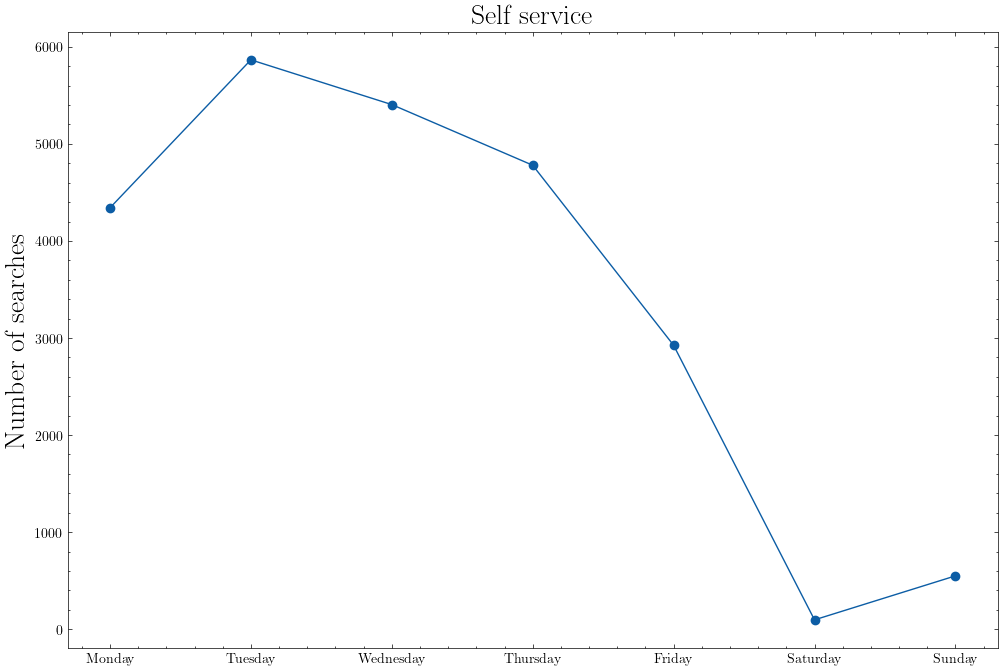

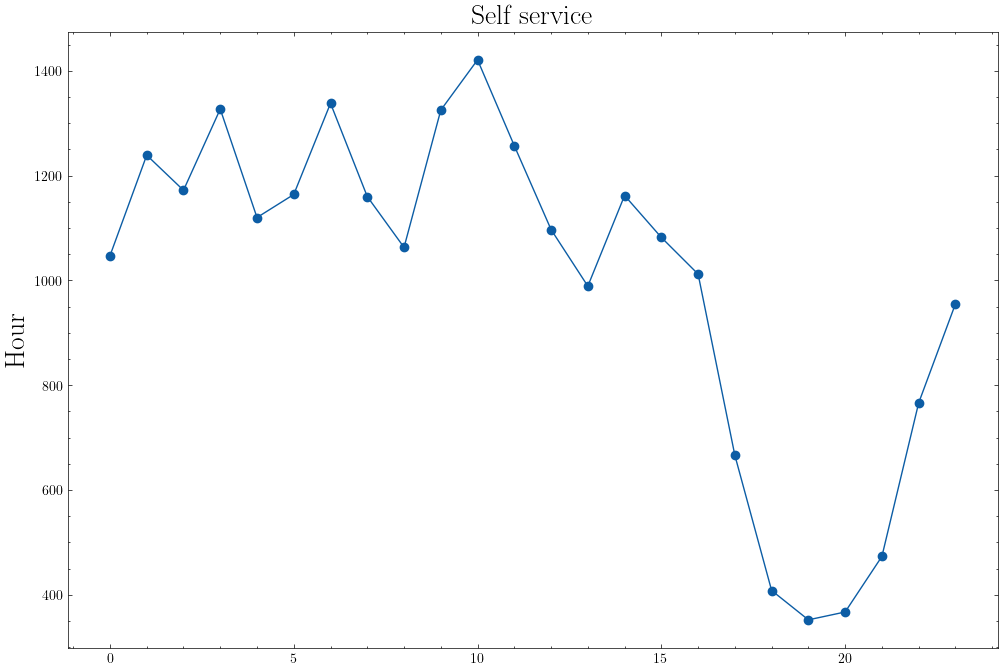

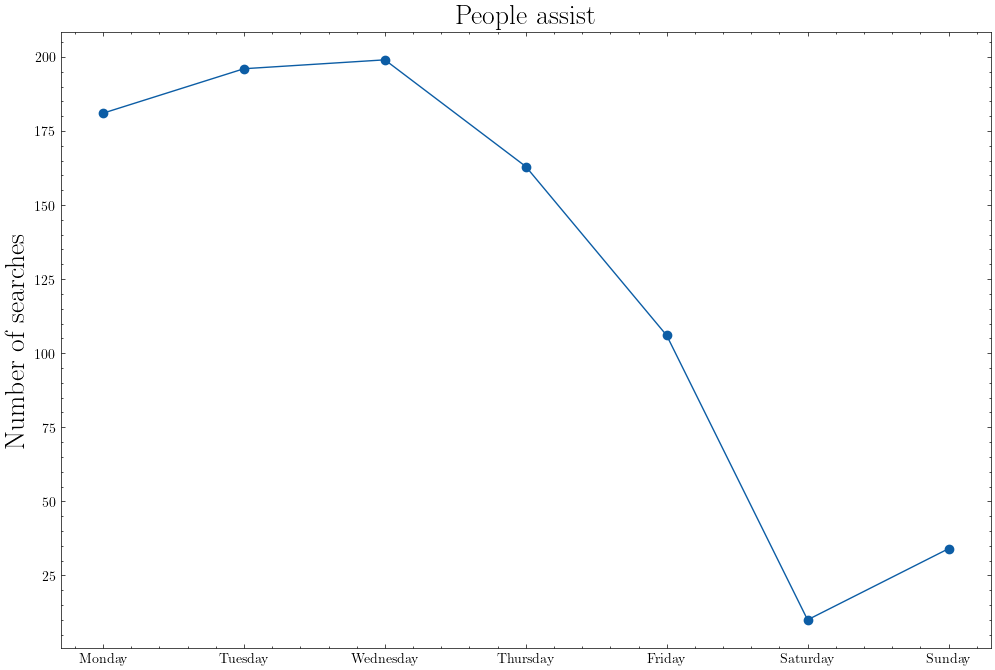

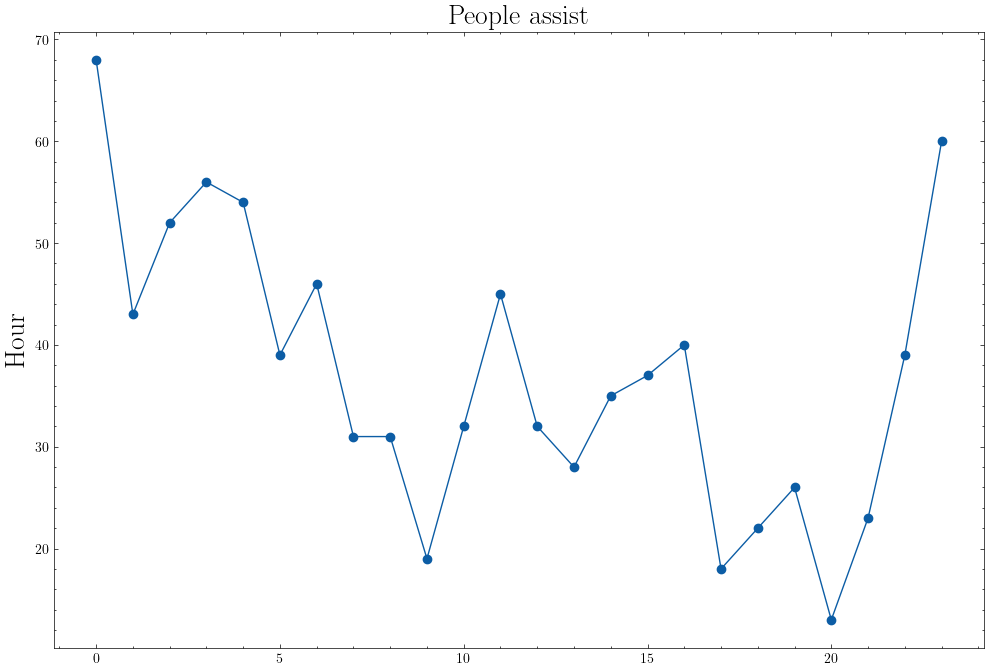

In [197]:
groupby_time(df_self_service, 'Self service')
groupby_time(df_people_assist, 'People assist')



# 5. Are there any common search behaviours? For example the number of words users type, the complexity of the search, the style of search, copy pasting words, searching ticket numbers instead of keywords, asking questions?



Be more specific 

# 6. How does click rank correlate with search query complexity? Do more specific queries tend to have higher click ranks?

Lets quantify "search query complexity" by the number of words that make up the query.


In [78]:
import matplotlib.pyplot as plt 
import scienceplots
import scipy
plt.style.use('science')



def plot_complexity(df,title):
    dftmp = df.copy()
    dftmp['query_complexity'] = dftmp['Search query'].str.split().str.len()
    dftmp = dftmp.sort_values('Click rank',ascending=True)


    xx = dftmp['Click rank']
    yy = dftmp['query_complexity']
    
    #Setup the figure
    h,w = 12,8
    rows = 1
    cols = 1
    fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(h,w))
    ax.scatter(xx,yy)
    ax.set_xlabel('Click rank')
    ax.set_ylabel('Complexity')


    rho,p = scipy.stats.pearsonr(xx, yy)    # Pearson's r

    rho
    ax.text(12,12,f'Correlation/pval: {round(rho,3), round(p,3)}', fontsize=20)
    ax.set_title(title,fontsize=18)





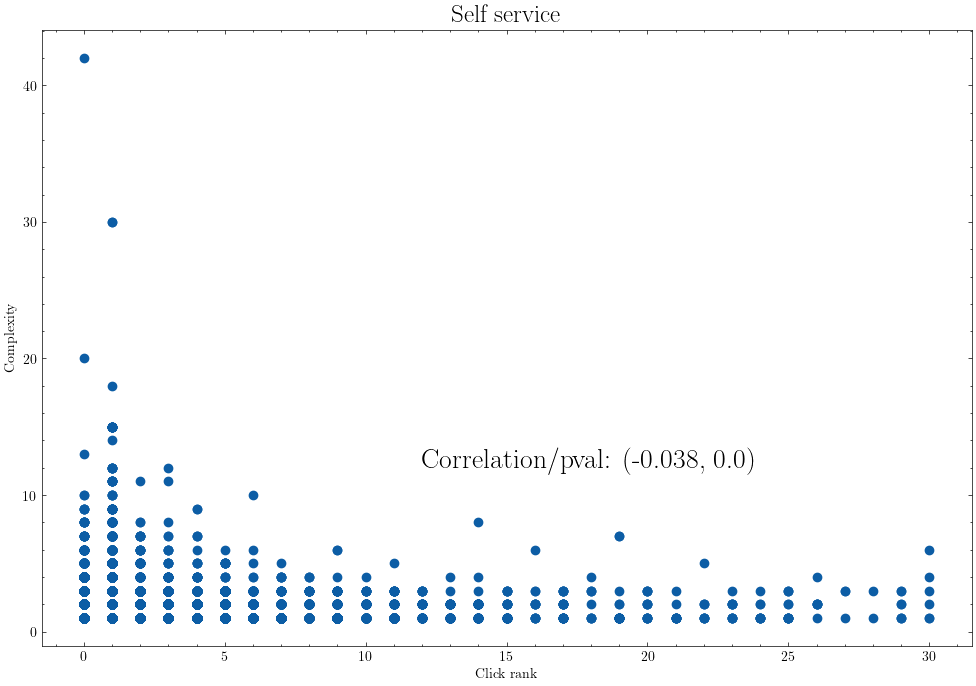

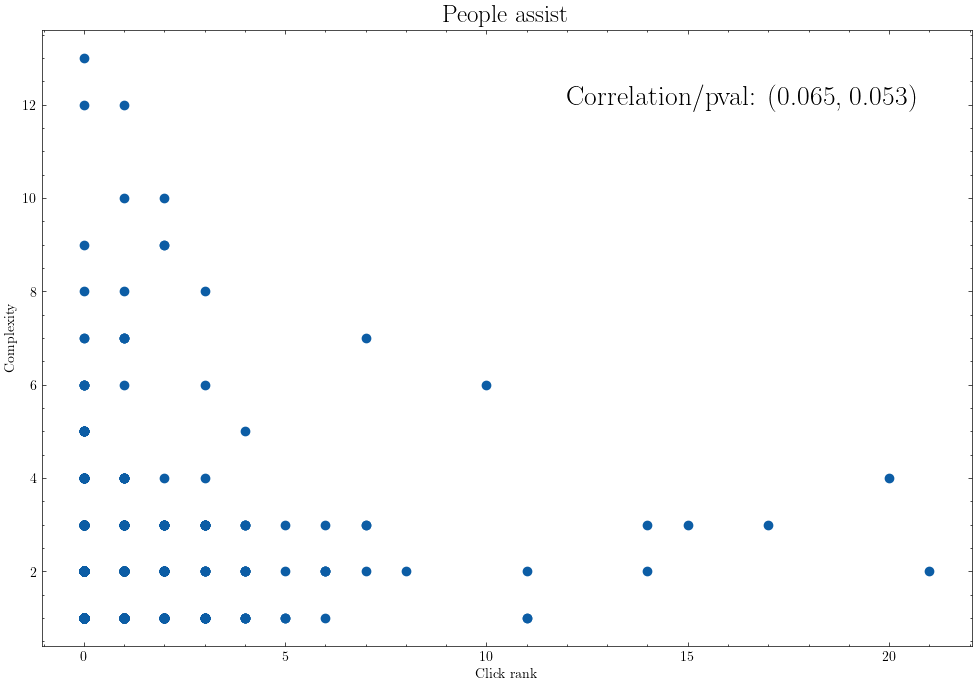

In [80]:
plot_complexity(df_self_service,'Self service')
plot_complexity(df_people_assist,'People assist')

No correlation between click rank and search complexity

# 7. Which queries have the highest and lowest click ranks?

Just treating this as pure queries, no splitting.

Note we also do no grouping here, but the search queries are not unique:

In [203]:
df_self_service['Search query'].is_unique

False

How do we want to combine the click rank?

In [206]:
df_self_service.groupby('Search query').count().sort_values('Has results', ascending=False)

,Has results,Click rank,Domain,Application ID,Created
Search query,,,,,
generic,372,372,372,372,372
ad group,260,260,260,260,260
cyberark,257,257,257,257,257
p400,220,220,220,220,220
jira,182,182,182,182,182
...,...,...,...,...,...
RITM2604805,1,1,1,1,1
RITM2604758,1,1,1,1,1
RITM2604614,1,1,1,1,1


Ok so "ad group" has a bunch of queries. Are the click ranks all the same?

In [212]:
display(df_self_service[df_self_service['Search query'] == 'ad group'].sort_values('Click rank', ascending=False))

,Search query,Has results,Click rank,Domain,Application ID,Created
24851,ad group,True,6,global,Service Portal: IT Self Service,2023-11-07 00:49:07
5279,ad group,True,5,global,Service Portal: IT Self Service,2023-11-30 12:35:09
4745,ad group,True,5,global,Service Portal: IT Self Service,2023-12-01 01:38:49
8726,ad group,True,4,global,Service Portal: IT Self Service,2023-11-27 16:00:28
15397,ad group,True,1,global,Service Portal: IT Self Service,2023-11-17 06:08:38
...,...,...,...,...,...,...
24412,ad group,True,0,global,Service Portal: IT Self Service,2023-11-07 08:06:59
4525,ad group,True,0,global,Service Portal: IT Self Service,2023-12-01 06:16:42
19389,ad group,True,0,global,Service Portal: IT Self Service,2023-11-13 21:17:12
23914,ad group,True,0,global,Service Portal: IT Self Service,2023-11-07 17:11:38


With those caveats in hand, lets go ahead and just do a naive method for now:

In [200]:
def query_click_rank(df):

    df1 = df.copy()
    print('Lowest:')
    display(df1.sort_values('Click rank',ascending=True).head(20))

    print('Highest:')
    display(df1.sort_values('Click rank',ascending=False).head(20))

In [213]:
print('**********Self service************')
query_click_rank(df_self_service)
print('**********People assist ************')
query_click_rank(df_people_assist)

**********Self service************
Lowest:


,Search query,Has results,Click rank,Domain,Application ID,Created
5445,fusion,True,0,global,Service Portal: IT Self Service,2023-11-30 09:58:21
6401,password,True,0,global,Service Portal: IT Self Service,2023-11-29 12:30:43
6400,password wifi,True,0,global,Service Portal: IT Self Service,2023-11-29 12:30:51
14381,INC2682782,False,0,global,Service Portal: IT Self Service,2023-11-20 05:10:29
14383,inisight,False,0,global,Service Portal: IT Self Service,2023-11-20 05:07:07
6394,SQL Server,True,0,global,Service Portal: IT Self Service,2023-11-29 12:36:09
6393,Azure SQL Server,True,0,global,Service Portal: IT Self Service,2023-11-29 12:36:29
6392,Azure SQL,True,0,global,Service Portal: IT Self Service,2023-11-29 12:36:33
6391,App Box,True,0,global,Service Portal: IT Self Service,2023-11-29 12:36:52
6390,Generic IT Request,True,0,global,Service Portal: IT Self Service,2023-11-29 12:37:20


Highest:


,Search query,Has results,Click rank,Domain,Application ID,Created
21535,emails is being rejected as spam,True,30,global,Service Portal: IT Self Service,2023-11-09 19:15:41
406,azure,True,30,global,Service Portal: IT Self Service,2023-12-07 04:51:48
17354,add accounts to server,True,30,global,Service Portal: IT Self Service,2023-11-15 12:00:50
16557,AP_R_User group access,True,30,global,Service Portal: IT Self Service,2023-11-16 05:53:08
21787,email dis,True,30,global,Service Portal: IT Self Service,2023-11-09 12:41:09
21786,email,True,30,global,Service Portal: IT Self Service,2023-11-09 12:41:56
9570,mainframe password reset,True,29,global,Service Portal: IT Self Service,2023-11-26 20:28:41
14023,Cloud firewal,True,29,global,Service Portal: IT Self Service,2023-11-20 10:17:42
18420,DATA,True,29,global,Service Portal: IT Self Service,2023-11-14 14:21:54
20924,Azure,True,29,global,Service Portal: IT Self Service,2023-11-10 10:30:48


**********People assist ************
Lowest:


,Search query,Has results,Click rank,Domain,Application ID,Created
66,IT self service,True,0,global,Service Portal: People Assist,2023-12-07 12:28:32
13746,phone number to discuss payrole,True,0,global,Service Portal: People Assist,2023-11-20 14:41:26
13764,headspace,False,0,global,Service Portal: People Assist,2023-11-20 14:26:11
13765,headspacce,False,0,global,Service Portal: People Assist,2023-11-20 14:26:06
13823,COE,True,0,global,Service Portal: People Assist,2023-11-20 13:47:50
13903,Parcels,False,0,global,Service Portal: People Assist,2023-11-20 12:31:45
13904,post to the office,True,0,global,Service Portal: People Assist,2023-11-20 12:31:39
13933,Resubmit MYIR,True,0,global,Service Portal: People Assist,2023-11-20 11:47:33
13745,i would like phone number to call some on abou...,True,0,global,Service Portal: People Assist,2023-11-20 14:42:39
13961,HR Document Request,True,0,global,Service Portal: People Assist,2023-11-20 11:09:10


Highest:


,Search query,Has results,Click rank,Domain,Application ID,Created
13067,IT request,True,21,global,Service Portal: People Assist,2023-11-21 05:38:30
9863,home working equipment claim,True,20,global,Service Portal: People Assist,2023-11-24 08:50:20
9778,private medical contact,True,17,global,Service Portal: People Assist,2023-11-24 11:17:15
6491,safety role pay,True,15,global,Service Portal: People Assist,2023-11-29 11:06:37
6211,pay bands,True,14,global,Service Portal: People Assist,2023-11-29 15:18:50
12314,NAO bank pto,True,14,global,Service Portal: People Assist,2023-11-21 18:50:33
19439,dependent tracking,True,11,global,Service Portal: People Assist,2023-11-13 18:55:57
5096,workday,True,11,global,Service Portal: People Assist,2023-11-30 16:14:29
18636,refer,True,11,global,Service Portal: People Assist,2023-11-14 10:27:16
7795,List of Singapore Specialist Panel Doctors,True,10,global,Service Portal: People Assist,2023-11-28 10:41:36


# Appendix / Scratch space 

In [23]:
df.sort_values('Click rank',ascending=False).head(20) 

,Search query,Has results,Click rank,Domain,Application ID,Created
16557,AP_R_User group access,True,30,global,Service Portal: IT Self Service,2023-11-16 05:53:08
17354,add accounts to server,True,30,global,Service Portal: IT Self Service,2023-11-15 12:00:50
21787,email dis,True,30,global,Service Portal: IT Self Service,2023-11-09 12:41:09
21535,emails is being rejected as spam,True,30,global,Service Portal: IT Self Service,2023-11-09 19:15:41
21786,email,True,30,global,Service Portal: IT Self Service,2023-11-09 12:41:56
406,azure,True,30,global,Service Portal: IT Self Service,2023-12-07 04:51:48
24125,add,True,29,global,Service Portal: IT Self Service,2023-11-07 13:06:50
2592,oracle fusion cloud,True,29,global,Service Portal: IT Self Service,2023-12-05 02:37:34
9570,mainframe password reset,True,29,global,Service Portal: IT Self Service,2023-11-26 20:28:41
20924,Azure,True,29,global,Service Portal: IT Self Service,2023-11-10 10:30:48


In [10]:
df.groupby(['Application ID']).count()

,Search query,Has results,Click rank,Domain,Created
Application ID,,,,,
Service Portal: IT Self Service,23962,24018,24018,24018,24018
Service Portal: People Assist,889,890,890,890,890
Service Portal: Service Workspace Portal,1,1,1,1,1


In [12]:
df1 = df[df['Application ID'] == 'Service Portal: IT Self Service']

In [14]:
df2 = df[df['Application ID'] == 'Service Portal: People Assist']

In [13]:
df1

,Search query,Has results,Click rank,Domain,Application ID,Created
0,genesys,True,4,global,Service Portal: IT Self Service,2023-12-07 13:55:10
1,generic,True,3,global,Service Portal: IT Self Service,2023-12-07 13:53:34
2,firewall,True,1,global,Service Portal: IT Self Service,2023-12-07 13:52:48
3,ad group,True,1,global,Service Portal: IT Self Service,2023-12-07 13:52:41
4,Power bi,True,5,global,Service Portal: IT Self Service,2023-12-07 13:51:03
...,...,...,...,...,...,...
24904,headset,True,1,global,Service Portal: IT Self Service,2023-11-07 00:07:16
24905,headset,True,1,global,Service Portal: IT Self Service,2023-11-07 00:06:49
24906,security vendor assessment,True,1,global,Service Portal: IT Self Service,2023-11-07 00:05:10
24907,project online,True,2,global,Service Portal: IT Self Service,2023-11-07 00:03:04


In [16]:
df2

,Search query,Has results,Click rank,Domain,Application ID,Created
66,IT self service,True,0,global,Service Portal: People Assist,2023-12-07 12:28:32
110,wifi,False,0,global,Service Portal: People Assist,2023-12-07 11:07:47
112,WFH Claim,True,2,global,Service Portal: People Assist,2023-12-07 11:05:10
131,Certificate of employment,True,2,global,Service Portal: People Assist,2023-12-07 10:45:02
132,COE,True,0,global,Service Portal: People Assist,2023-12-07 10:44:48
...,...,...,...,...,...,...
24853,amend purchased leave,True,0,global,Service Portal: People Assist,2023-11-07 00:46:13
24888,Statement of Employment,True,0,global,Service Portal: People Assist,2023-11-07 00:20:26
24889,Statment of Employment,True,0,global,Service Portal: People Assist,2023-11-07 00:20:22
24890,Career Break,True,0,global,Service Portal: People Assist,2023-11-07 00:20:13


In [7]:
df['Application ID'].unique()

array(['Service Portal: IT Self Service', 'Service Portal: People Assist',
       'Service Portal: Service Workspace Portal'], dtype=object)

In [11]:
df.loc[df['Application ID'] == 'Service Portal: Service Workspace Portal']

,Search query,Has results,Click rank,Domain,Application ID,Created
23489,i have a question,False,0,global,Service Portal: Service Workspace Portal,2023-11-08 03:10:42
